**Importing Modules**

In [ ]:
import matplotlib.pyplot as plt
import IPython.display as ipd

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d warcoder/cats-vs-dogs-vs-birds-audio-classification

 60% 8.00M/13.2M [00:00<00:00, 82.5MB/s]
100% 13.2M/13.2M [00:00<00:00, 114MB/s] 


**Dataset**

In [ ]:
!unzip cats-vs-dogs-vs-birds-audio-classification.zip -d audio_dataset

Archive:  cats-vs-dogs-vs-birds-audio-classification.zip
  inflating: audio_dataset/Animals/bird/00b01445_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/00f0204f_nohash_1.wav  
  inflating: audio_dataset/Animals/bird/00f0204f_nohash_3.wav  
  inflating: audio_dataset/Animals/bird/01648c51_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/01bcfc0c_nohash_1.wav  
  inflating: audio_dataset/Animals/bird/0474c92a_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/095847e4_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/096456f9_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/09bcdc9d_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/0a7c2a8d_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/0b40aa8e_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/0b56bcfe_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/0bde966a_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/0f7dc557_nohash_0.wav  
  inflating: audio_dataset/Animals/bird/12c206e

**Creating spectograph**

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

data_folder = '/content/audio_dataset/Animals'
output_folder = '/content/spectrogram_dataset'

# Function to create spectrogram
def generate_spectrogram(file_path, output_path):
    audio, sr = librosa.load(file_path, sr=None)

    # Compute spectrogram
    Sp = librosa.feature.melspectrogram(y=audio, sr=sr)
    k = librosa.power_to_db(Sp, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(k, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.savefig(output_path)
    plt.close()

# Iterate through all files in the data folder
file_count = 0
total_files = sum([len(files) for _, _, files in os.walk(data_folder)])
for root, dirs, files in os.walk(data_folder):
    for file in files:
        if file.endswith('.wav'):
            file_count += 1
            print(f"file count {file_count}/{total_files}...")
            class_name = os.path.basename(root)
            class_folder = os.path.join(output_folder, class_name)
            os.makedirs(class_folder, exist_ok=True)

            # Generate spectrogram and save
            file_path = os.path.join(root, file)
            output_path = os.path.join(class_folder, file.replace('.wav', '.png'))
            generate_spectrogram(file_path, output_path)



file count 1/610...
file count 2/610...
file count 3/610...
file count 4/610...
file count 5/610...
file count 6/610...
file count 7/610...
file count 8/610...
file count 9/610...
file count 10/610...
file count 11/610...
file count 12/610...
file count 13/610...
file count 14/610...
file count 15/610...
file count 16/610...
file count 17/610...
file count 18/610...
file count 19/610...
file count 20/610...
file count 21/610...
file count 22/610...
file count 23/610...
file count 24/610...
file count 25/610...
file count 26/610...
file count 27/610...
file count 28/610...
file count 29/610...
file count 30/610...
file count 31/610...
file count 32/610...
file count 33/610...
file count 34/610...
file count 35/610...
file count 36/610...
file count 37/610...
file count 38/610...
file count 39/610...
file count 40/610...
file count 41/610...
file count 42/610...
file count 43/610...
file count 44/610...
file count 45/610...
file count 46/610...
file count 47/610...
file count 48/610...
f

generate_spectrogram function takes the file path of an audio file and the output path for the generated spectrogram. It loads the audio file using librosa, computes the mel-frequency spectrogram using librosa.feature.melspectrogram, converts power to dB scale using librosa.power_to_db, and then visualizes the spectrogram using librosa.display.specshow. Finally, it saves the spectrogram image to the specified output path

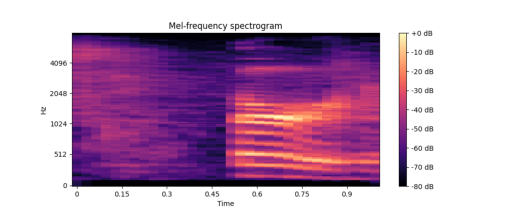

In [ ]:

# Sample file
sample_file = '/content/audio_dataset/Animals/bird/00b01445_nohash_0.wav'
sample_output = '/content/sample_spectrogram.png'

generate_spectrogram(sample_file, sample_output)
import matplotlib.image as mpimg

image_path = '/content/sample_spectrogram.png'
image = mpimg.imread(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()
ipd.Audio(sample_file)



**Building CNN**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

spectrogram_folder = '/content/spectrogram_dataset'

def load_data(folder):
    images = []
    labels = []
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            images.append(image_path)
            labels.append(class_name)
    return images, labels

images, labels = load_data(spectrogram_folder)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

img_height, img_width = 128, 128
input_shape = (img_height, img_width, 3)

batch_size = 16
num_classes = len(np.unique(labels))

print("number of classes ",num_classes)


number of classes  3


In [ ]:
# Create data generator for training
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory=spectrogram_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 610 images belonging to 3 classes.


In [ ]:

# Create data generator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directory=spectrogram_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 610 images belonging to 3 classes.


In [ ]:


# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
# Train the model with progress tracking
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose=1)

Epoch 1/20
38/38 [==============================] - 25s 416ms/step - loss: 1.1175 - accuracy: 0.3215 - val_loss: 1.0815 - val_accuracy: 0.4523
Epoch 2/20
38/38 [==============================] - 15s 411ms/step - loss: 0.9863 - accuracy: 0.5051 - val_loss: 0.8230 - val_accuracy: 0.6398
Epoch 3/20
38/38 [==============================] - 17s 446ms/step - loss: 0.6105 - accuracy: 0.7660 - val_loss: 0.3368 - val_accuracy: 0.8766
Epoch 4/20
38/38 [==============================] - 16s 437ms/step - loss: 0.2903 - accuracy: 0.8923 - val_loss: 0.1961 - val_accuracy: 0.9260
Epoch 5/20
38/38 [==============================] - 16s 419ms/step - loss: 0.2834 - accuracy: 0.8923 - val_loss: 0.1677 - val_accuracy: 0.9391
Epoch 6/20
38/38 [==============================] - 16s 425ms/step - loss: 0.1826 - accuracy: 0.9394 - val_loss: 0.1188 - val_accuracy: 0.9556
Epoch 7/20
38/38 [==============================] - 16s 422ms/step - loss: 0.1212 - accuracy: 0.9579 - val_loss: 0.0726 - val_accuracy: 0.9770

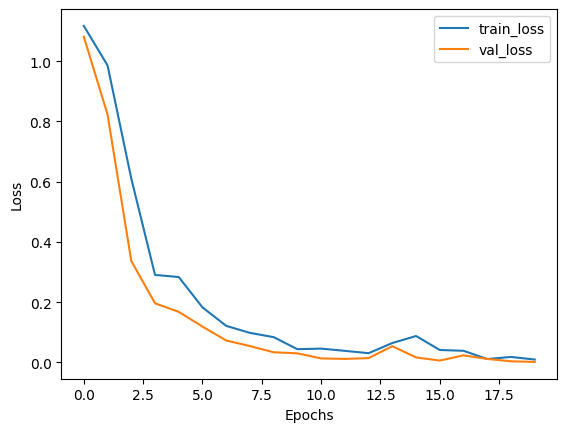

In [ ]:


# Plot training and validation losses
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

# Generate predictions
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)




39/39 - 5s - loss: 0.0014 - accuracy: 1.0000 - 5s/epoch - 137ms/step
39/39 [==============================] - 5s 138ms/step


In [ ]:
print("Classification Report:")
print(classification_report(validation_generator.classes, y_pred_classes))
print('\nTest accuracy:', test_acc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       207
           2       1.00      1.00      1.00       210

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610


Test accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(validation_generator.classes, y_pred_classes)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[193   0   0]
 [  0 207   0]
 [  0   0 210]]


**Experimenting with different kernel sizes, number of kernels and maxpooling size**

In [ ]:
# Define the CNN model with increased number of kernels
model2 = models.Sequential([
    layers.Conv2D(12, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Train the model with progress tracking
history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose=1)

Epoch 1/10
38/38 [==============================] - 19s 427ms/step - loss: 1.1320 - accuracy: 0.3249 - val_loss: 1.0978 - val_accuracy: 0.3421
Epoch 2/10
38/38 [==============================] - 12s 310ms/step - loss: 1.0939 - accuracy: 0.3721 - val_loss: 1.0710 - val_accuracy: 0.3405
Epoch 3/10
38/38 [==============================] - 12s 313ms/step - loss: 0.8904 - accuracy: 0.5909 - val_loss: 0.6036 - val_accuracy: 0.7977
Epoch 4/10
38/38 [==============================] - 16s 421ms/step - loss: 0.4691 - accuracy: 0.8232 - val_loss: 0.3710 - val_accuracy: 0.8536
Epoch 5/10
38/38 [==============================] - 21s 557ms/step - loss: 0.3142 - accuracy: 0.8737 - val_loss: 0.2297 - val_accuracy: 0.9145
Epoch 6/10
38/38 [==============================] - 12s 331ms/step - loss: 0.2327 - accuracy: 0.9242 - val_loss: 0.1661 - val_accuracy: 0.9359
Epoch 7/10
38/38 [==============================] - 17s 443ms/step - loss: 0.2054 - accuracy: 0.9226 - val_loss: 0.1949 - val_accuracy: 0.9424

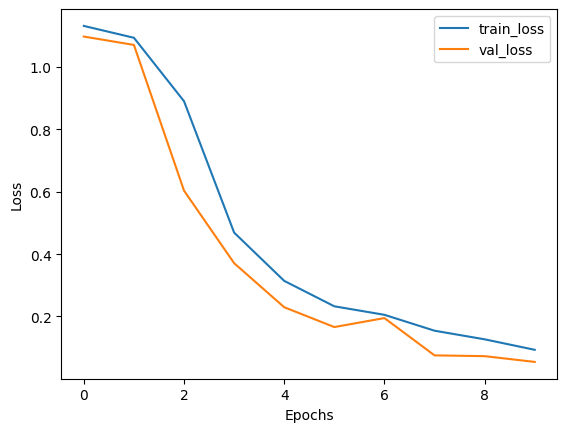

In [ ]:


# Plot training and validation losses
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

# Evaluate the model
test_loss, test_acc = model2.evaluate(validation_generator, verbose=2)

# Generate predictions
y_pred = model2.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)




39/39 - 12s - loss: 0.0541 - accuracy: 0.9803 - 12s/epoch - 306ms/step
39/39 [==============================] - 6s 159ms/step


In [ ]:
print("Classification Report:")
print(classification_report(validation_generator.classes, y_pred_classes))
print('\nTest accuracy:', test_acc)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(validation_generator.classes, y_pred_classes)

print("\nConfusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       193
           1       0.99      0.97      0.98       207
           2       0.98      0.98      0.98       210

    accuracy                           0.98       610
   macro avg       0.98      0.98      0.98       610
weighted avg       0.98      0.98      0.98       610


Test accuracy: 0.980327844619751

Confusion Matrix:
[[192   0   1]
 [  2 201   4]
 [  3   2 205]]


In [ ]:
# Define the CNN model with increased size of kernel and maxpooling


# Define the CNN model
model3 = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:

# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 29, 29, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 25, 128)       204928    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 128)      

In [ ]:
# Train the model with progress tracking
history = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose=1)

Epoch 1/10
38/38 [==============================] - 20s 453ms/step - loss: 1.1127 - accuracy: 0.3232 - val_loss: 1.0971 - val_accuracy: 0.3405
Epoch 2/10
38/38 [==============================] - 12s 313ms/step - loss: 1.1003 - accuracy: 0.3822 - val_loss: 1.0714 - val_accuracy: 0.3849
Epoch 3/10
38/38 [==============================] - 12s 313ms/step - loss: 0.9210 - accuracy: 0.5758 - val_loss: 0.4987 - val_accuracy: 0.8207
Epoch 4/10
38/38 [==============================] - 16s 420ms/step - loss: 0.4153 - accuracy: 0.8603 - val_loss: 0.2477 - val_accuracy: 0.9030
Epoch 5/10
38/38 [==============================] - 17s 439ms/step - loss: 0.2434 - accuracy: 0.9209 - val_loss: 0.1624 - val_accuracy: 0.9539
Epoch 6/10
38/38 [==============================] - 15s 397ms/step - loss: 0.2056 - accuracy: 0.9343 - val_loss: 0.1250 - val_accuracy: 0.9539
Epoch 7/10
38/38 [==============================] - 16s 418ms/step - loss: 0.1644 - accuracy: 0.9461 - val_loss: 0.0740 - val_accuracy: 0.9671

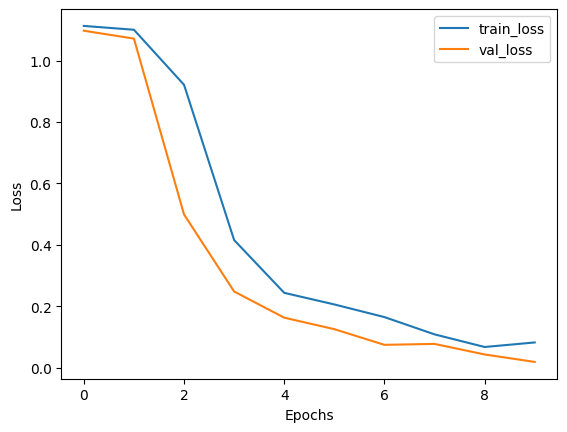

In [ ]:


# Plot training and validation losses
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

# Evaluate the model
test_loss, test_acc = model3.evaluate(validation_generator, verbose=2)

# Generate predictions
y_pred = model3.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)




39/39 - 6s - loss: 0.0183 - accuracy: 0.9984 - 6s/epoch - 141ms/step
39/39 [==============================] - 7s 185ms/step


In [ ]:
print("Classification Report:")
print(classification_report(validation_generator.classes, y_pred_classes))
print('\nTest accuracy:', test_acc)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(validation_generator.classes, y_pred_classes)

print("\nConfusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       193
           1       1.00      1.00      1.00       207
           2       1.00      1.00      1.00       210

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610


Test accuracy: 0.9983606338500977

Confusion Matrix:
[[193   0   0]
 [  1 206   0]
 [  0   0 210]]


In [ ]:
# CNN model with different stride values
model4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', strides=(2, 1)),  # Added stride
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', strides=(3, 2)),  # Added stride
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:

# Compile the model
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 31, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 15, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 14, 128)        73856     
                                                                 
 flatten_3 (Flatten)         (None, 8960)             

In [ ]:
# Train the model with progress tracking
history = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose=1)

Epoch 1/10
38/38 [==============================] - 14s 326ms/step - loss: 1.1439 - accuracy: 0.3620 - val_loss: 1.1043 - val_accuracy: 0.3405
Epoch 2/10
38/38 [==============================] - 12s 327ms/step - loss: 1.0075 - accuracy: 0.4882 - val_loss: 0.8058 - val_accuracy: 0.6497
Epoch 3/10
38/38 [==============================] - 17s 453ms/step - loss: 0.7030 - accuracy: 0.7306 - val_loss: 0.6053 - val_accuracy: 0.7418
Epoch 4/10
38/38 [==============================] - 12s 325ms/step - loss: 0.4283 - accuracy: 0.8199 - val_loss: 0.2774 - val_accuracy: 0.9030
Epoch 5/10
38/38 [==============================] - 13s 335ms/step - loss: 0.2921 - accuracy: 0.8973 - val_loss: 0.1803 - val_accuracy: 0.9408
Epoch 6/10
38/38 [==============================] - 16s 439ms/step - loss: 0.2475 - accuracy: 0.9091 - val_loss: 0.1516 - val_accuracy: 0.9457
Epoch 7/10
38/38 [==============================] - 17s 455ms/step - loss: 0.1812 - accuracy: 0.9343 - val_loss: 0.1081 - val_accuracy: 0.9605

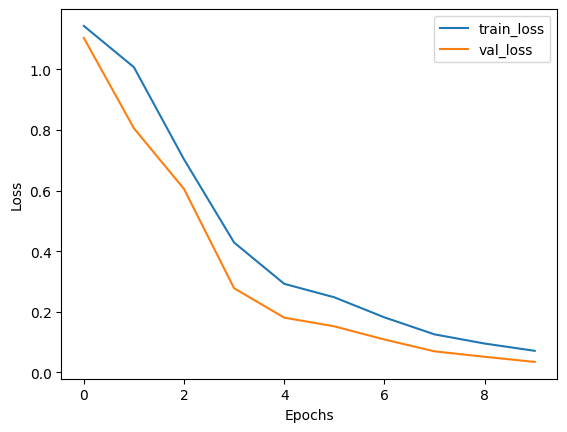

In [ ]:


# Plot training and validation losses
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

# Evaluate the model
test_loss, test_acc = model4.evaluate(validation_generator, verbose=2)

# Generate predictions
y_pred = model4.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)




39/39 - 5s - loss: 0.0340 - accuracy: 0.9984 - 5s/epoch - 137ms/step
39/39 [==============================] - 6s 140ms/step


In [ ]:
print("Classification Report:")
print(classification_report(validation_generator.classes, y_pred_classes))
print('\nTest accuracy:', test_acc)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(validation_generator.classes, y_pred_classes)

print("\nConfusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       207
           2       1.00      1.00      1.00       210

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610


Test accuracy: 0.9983606338500977

Confusion Matrix:
[[193   0   0]
 [  0 206   1]
 [  0   0 210]]


# TASK2

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

# Our dictionary will contain only of the top 7000 words appearing most frequently
top_words = 7000
# Now we split our data-set into training and test data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# Looking at the nature of training data
print(X_train[0])
print(y_train[0])
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

17464789/17464789 [==============================] - 1s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32

In [ ]:
from keras.layers import Dropout
# Padding the data samples to a maximum review length in words
max_words = 450
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# Building the CNN Model




model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout layer
model.add(Dense(1, activation='sigmoid'))  # Using 'sigmoid' for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 450, 32)           224000    
                                                                 
 conv1d_3 (Conv1D)           (None, 450, 64)           6208      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 225, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 225, 64)           12352     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 112, 64)           0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 7168)             

In [ ]:
# Fitting the data onto model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=2)
# Getting score metrics from our model
scores = model.evaluate(X_test, y_test, verbose=0)
# Displays the accuracy of correct sentiment prediction over test data
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
196/196 - 22s - loss: 0.4703 - accuracy: 0.7390 - val_loss: 0.2787 - val_accuracy: 0.8826 - 22s/epoch - 114ms/step
Epoch 2/5
196/196 - 13s - loss: 0.2165 - accuracy: 0.9169 - val_loss: 0.2772 - val_accuracy: 0.8836 - 13s/epoch - 68ms/step
Epoch 3/5
196/196 - 9s - loss: 0.1645 - accuracy: 0.9404 - val_loss: 0.3034 - val_accuracy: 0.8758 - 9s/epoch - 48ms/step
Epoch 4/5
196/196 - 9s - loss: 0.1158 - accuracy: 0.9594 - val_loss: 0.3288 - val_accuracy: 0.8794 - 9s/epoch - 47ms/step
Epoch 5/5
196/196 - 7s - loss: 0.0808 - accuracy: 0.9730 - val_loss: 0.3811 - val_accuracy: 0.8757 - 7s/epoch - 33ms/step
Accuracy: 87.57%
